<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/04%20-%20ENEM_Avalia%C3%A7%C3%A3o_da_Educa%C3%A7%C3%A3o_B%C3%A1sica-Thiago%20Furuchima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Entendimento do Problema

> O Exame Nacional do Ensino Médio (ENEM) é a principal prova de admissão à educação superior no Brasil.
>
> A nota do ENEM é utilizada por universidades públicas e privadas na seleção de estudantes, bem como constitui requisito para obtenção de bolsas no ProUni ou financiamento através do Fies.
>
> Em que pese a prova ser realizada principalmente por estudantes jovens egressos do Ensino Médio, é também realizada por adultos que desejam ingressar na educação superior.
>
> Nesse contexto, o objetivo do trabalho é caracterizar os dois grupos, jovens e adultos, oriundos de escolas públicas, identificando variáveis que podem ser importantes para descrever o desempenho final desses candidatos.
>
> A base de dados utilizada é a "Microdados do ENEM 2019", disponível no [site do INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados). 

 ### Análise dos Tipos das Variáveis

A base de dados completa possui mais de 400 campos, de modo que apenas o seguinte subconjunto foi considerado na realização desse trabalho:

> Variáveis Quantitativas:
*   NU_IDADE - Idade
*   NU_NOTA_CN - Ciências da Natureza
*   NU_NOTA_CH - Ciências Humanas
*   NU_NOTA_MT - Matemática
*   NU_NOTA_LC - Linguagens e Códigos
*   NU_NOTA_REDACAO - Redação

> Variáveis Qualitativas:
*   ADULTO - Adulto ou Jovem
*   TP_COR_RACA - Cor/Raça
*   TP_LINGUA - Idioma de preferência
*   Q024_DESC - Candidato possui computador em casa?
*   Q025_DESC - Candidato possui internet em casa?

## 2. Preparação dos Dados

In [ ]:
# Realiza o download dos microdados do ENEM do site do INEP
# ETA aprox. 25 min
!wget -q --show-progress https://download.inep.gov.br/microdados/microdados_enem_2019.zip

--2021-09-01 00:43:13--  https://download.inep.gov.br/microdados/microdados_enem_2019.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 728357831 (695M) [application/zip]
Saving to: ‘microdados_enem_2019.zip’

microdados_enem_201 100%[===================>] 694.62M   571KB/s    in 19m 50s 

2021-09-01 01:03:04 (598 KB/s) - ‘microdados_enem_2019.zip’ saved [728357831/728357831]



In [ ]:
# extrai os microdados para a pasta DADOS
!unzip \
-j \
'microdados_enem_2019.zip' \
'DADOS/MICRODADOS_ENEM_2019.csv' \
-d 'DADOS'

Archive:  microdados_enem_2019.zip
  inflating: DADOS/MICRODADOS_ENEM_2019.csv  


In [ ]:
# importa as bibliotecas
import pandas as pd
import glob
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Cria banco de dados SQLite
conn = sqlalchemy.create_engine('sqlite:///bd.sqlite')
inspector = sqlalchemy.inspect(conn)

In [ ]:
# Carrega as informações dos ENEM para uma base SQLite
# A carga está sendo realizada com o pandas, em blocos (chunks)
# para uma base sqlite, de modo a não estourar a memória do Colab
# ETA aprox. 30 min.
chunksize = 1e5
filename = 'DADOS/MICRODADOS_ENEM_2019.csv'
for chunk in pd.read_csv(filename, sep=';', chunksize=chunksize, encoding='iso-8859-1'):
  chunk.to_sql('MICRODADOS_ENEM_2019', if_exists='append', con=conn)

In [ ]:
# Verifica a carga na base SQLite
inspector.get_table_names()

['MICRODADOS_ENEM_2019']

In [ ]:
# Seleciona informações do enem de alunos de escolas públicas
sql = ''' SELECT NU_INSCRICAO,
          NU_ANO,
          CO_MUNICIPIO_RESIDENCIA,
          NO_MUNICIPIO_RESIDENCIA,
          CO_UF_RESIDENCIA,
          SG_UF_RESIDENCIA,
          NU_IDADE,
          TP_SEXO,
          TP_ESTADO_CIVIL,
          TP_COR_RACA,
          TP_NACIONALIDADE,
          CO_MUNICIPIO_NASCIMENTO,
          NO_MUNICIPIO_NASCIMENTO,
          CO_UF_NASCIMENTO,
          SG_UF_NASCIMENTO,
          TP_ST_CONCLUSAO,
          TP_ANO_CONCLUIU,
          TP_ESCOLA,
          TP_ENSINO,
          IN_TREINEIRO,
          CO_ESCOLA,
          CO_MUNICIPIO_ESC,
          NO_MUNICIPIO_ESC,
          CO_UF_ESC,
          SG_UF_ESC,
          TP_DEPENDENCIA_ADM_ESC,
          TP_LOCALIZACAO_ESC,
          TP_SIT_FUNC_ESC,
          TP_PRESENCA_CN,
          TP_PRESENCA_CH,
          TP_PRESENCA_LC,
          TP_PRESENCA_MT,
          NU_NOTA_CN,
          NU_NOTA_CH,
          NU_NOTA_LC,
          NU_NOTA_MT,
          NU_NOTA_REDACAO,
          TP_LINGUA,
          Q024,
          Q025
          FROM MICRODADOS_ENEM_2019 ENEM
          WHERE TP_ESCOLA = 2 -- Escola Pública
          '''
df = pd.read_sql_query(sql, conn)

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_LINGUA,Q024,Q025
0,190001592266,2019,3550308,São Paulo,35,SP,17.0,M,1,1,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,1,1,1,1,543.9,548.1,502.5,480.7,400.0,0,B,B
1,190001237803,2019,3170206,Uberlândia,31,MG,30.0,F,1,2,1,3170206.0,Uberlândia,31.0,MG,2,0,2,2.0,0,31167835.0,3170206.0,Uberlândia,31.0,MG,2.0,1.0,1.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,A,A
2,190001692704,2019,4300604,Alvorada,43,RS,18.0,F,1,1,1,4300604.0,Alvorada,43.0,RS,2,0,2,1.0,0,43013945.0,4300604.0,Alvorada,43.0,RS,2.0,1.0,1.0,1,1,1,1,430.4,466.8,515.9,394.1,580.0,1,B,A
3,190001595660,2019,3523107,Itaquaquecetuba,35,SP,17.0,F,1,2,1,3550308.0,São Paulo,35.0,SP,2,0,2,1.0,0,35006713.0,3530607.0,Mogi das Cruzes,35.0,SP,2.0,1.0,1.0,1,1,1,1,371.8,501.4,518.6,442.0,660.0,1,A,B
4,190001421552,2019,2919207,Lauro de Freitas,29,BA,17.0,M,1,2,1,2919207.0,Lauro de Freitas,29.0,BA,2,0,2,1.0,0,29398673.0,2919207.0,Lauro de Freitas,29.0,BA,2.0,1.0,1.0,1,1,1,1,567.3,584.1,595.8,704.5,620.0,0,A,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247262 entries, 0 to 1247261
Data columns (total 40 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   NU_INSCRICAO             1247262 non-null  int64  
 1   NU_ANO                   1247262 non-null  int64  
 2   CO_MUNICIPIO_RESIDENCIA  1247262 non-null  int64  
 3   NO_MUNICIPIO_RESIDENCIA  1247262 non-null  object 
 4   CO_UF_RESIDENCIA         1247262 non-null  int64  
 5   SG_UF_RESIDENCIA         1247262 non-null  object 
 6   NU_IDADE                 1247226 non-null  float64
 7   TP_SEXO                  1247262 non-null  object 
 8   TP_ESTADO_CIVIL          1247262 non-null  int64  
 9   TP_COR_RACA              1247262 non-null  int64  
 10  TP_NACIONALIDADE         1247262 non-null  int64  
 11  CO_MUNICIPIO_NASCIMENTO  1203623 non-null  float64
 12  NO_MUNICIPIO_NASCIMENTO  1203623 non-null  object 
 13  CO_UF_NASCIMENTO         1203623 non-null 

## 3. Análise Exploratória

Como estamos interessados em entender a relação entre a idade do candidato e o desempenho no ENEM, vamos inicialmente verificar a distribuição da variável NU_IDADE

In [ ]:
# Verifica a qtd de dados nulos no campo NU_IDADE
df['NU_IDADE'].isna().sum()

36

In [ ]:
# Verifica as principais estatísticas descritivas da IDADE
df['NU_IDADE'].describe()

count    1.247226e+06
mean     1.843875e+01
std      3.565898e+00
min      1.000000e+01
25%      1.700000e+01
50%      1.800000e+01
75%      1.800000e+01
max      9.100000e+01
Name: NU_IDADE, dtype: float64

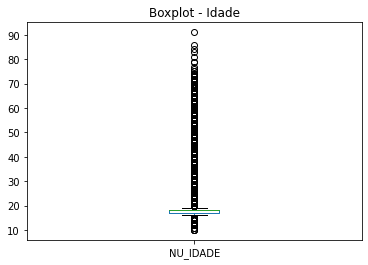

In [ ]:
# Plota o Boxplot da Idade
df['NU_IDADE'].plot(kind='box')
plt.title("Boxplot - Idade")
plt.show()

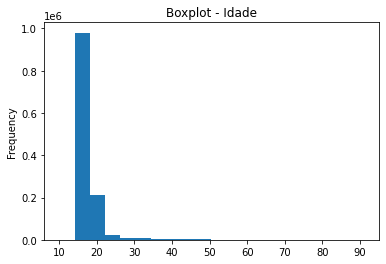

In [ ]:
# Plota o histograma da idade
df['NU_IDADE'].plot(kind='hist', bins=20)
plt.title("Boxplot - Idade")
plt.show()


> * A idade média do aluno que realizou o ENEM em 2019 oriundo de escola pública é 18.4 anos
> 
> * O desvio padrão de 3.56
> 
> * A distribuição é "right skewed", possuindo quantidade relevante de outliers de grande valor.

> "Art. 28. Observado o disposto no art. 4º, inciso VII, da Lei nº 9.394/1996, a idade mínima para matrícula em cursos da EJA e para inscrição e realização de exames de conclusão da EJA do Ensino Médio (3º segmento) é de **18 (dezoito) anos** completos." [Resolução nº 1, de 28 DE Maio de 2021](https://https://www.in.gov.br/en/web/dou/-/resolucao-n-1-de-28-de-maio-de-2021-323283442)
> 
> Tendo em vista que a idade mínima para ingresso no EJA é 18 anos, vamos definir 19 anos como "ponto de corte", uma vez que o aluno levaria no mínimo um ano para concluir as etapas do Ensino Médio.



In [ ]:
# Mapeia o valor para string
df['ADULTO'] = (df['NU_IDADE']>=19).map({True: "Adulto", 
                                        False: "Jovem"})

# Converte a variável qualitativa em category para conveniencia e performance
df['ADULTO'] = df['ADULTO'].astype('category')

In [ ]:
# Verifica as qtds por grupo
df['ADULTO'].value_counts()

Jovem     980144
Adulto    267118
Name: ADULTO, dtype: int64

In [ ]:
# Verifica as qtds por grupo (normalizado entre 0 e 1)
df['ADULTO'].value_counts(normalize=True)

Jovem     0.785836
Adulto    0.214164
Name: ADULTO, dtype: float64

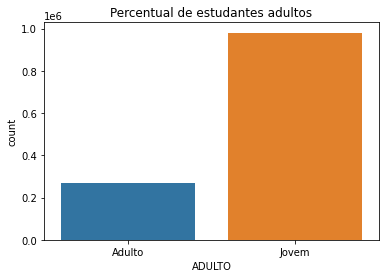

In [ ]:
# Plota a qtd de candidatos, por grupo
sns.countplot(data=df, x='ADULTO')
plt.title("Percentual de estudantes adultos")
plt.show()

> Cerca de 21% da população analisada possui 19 anos de idade ou mais.
Definido nosso ponto de corte, passemos a analisar os dois grupos.
Nossa primeira verificação será em relação a dados faltantes, especificamente em relação às "notas faltantes".

#### Qual o desempenho do candidato?

In [ ]:
# Calcula a nota total do estudante
# CN - Ciências da Natureza
# MT - Matemática
# CH - Ciências Humanas
# LC - Linguagens e Códigos
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [ ]:
# Calcula a quantidade de candidatos que não possuem alguma das notas
df.set_index('ADULTO')[colunas_notas].isna().mean(level=0)

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
ADULTO,,,,,
Jovem,0.147316,0.147316,0.107878,0.107878,0.107879
Adulto,0.341168,0.341168,0.279038,0.279038,0.279038


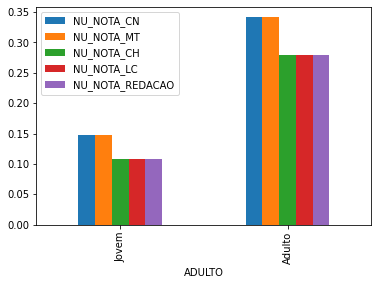

In [ ]:
# Plota o gráfico de barras da qtd de notas nulas por prova e por grupo
df.set_index('ADULTO')[colunas_notas].isna().mean(level=0).plot(kind='bar')

> Aqui já temos um importante achado sobre os candidatos adultos: o percentual de alunos sem alguma das notas é mais que o dobro daquele verificado no outro grupo.
> 
> Cerca de 35% dos candidatos adultos oriundos de escolas públicas não possuem nota para as provas de Matemática (MT) e Conhecimentos da Natureza, possivelmente por não terem comparecido para a realização da mesma, uma vez que o ENEM é realizado em mais de um dia.
> 
> Tendo em vista que a grande quantidade de notas faltantes pode impactar nossa análise sobre as notas dos candidatos, vamos desconsiderar os dados nulos nessas colunas, para a análise da "Nota Total".

In [ ]:
# Calcula a nota total do candidato desconsiderando os registros que possuem notas nulas
df['NOTA_TOTAL'] = df.dropna(subset=colunas_notas)[colunas_notas].sum(axis=1)

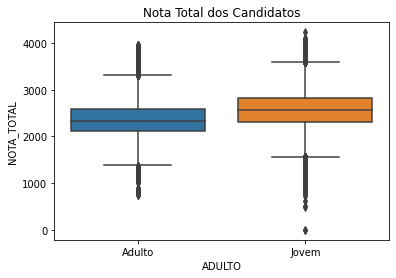

In [ ]:
# Plota o boxplot da Nota Total por grupo
sns.boxplot(data=df.dropna(), x='ADULTO', y='NOTA_TOTAL')
plt.title("Nota Total dos Candidatos")
plt.show()

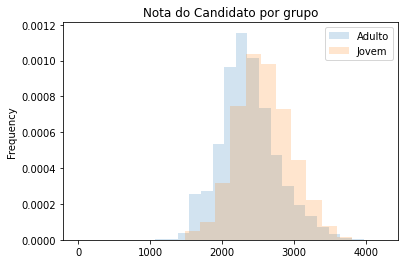

In [ ]:
# Plota o histograma da Nota Total por grupo
df.dropna().groupby('ADULTO')['NOTA_TOTAL'].plot(kind='hist', alpha=0.2, density=True, bins=20)
plt.title("Nota do Candidato por grupo")
plt.legend()
plt.show()

In [ ]:
# Verifica as principais estatísticas descritivas da Nota Total, desconsiderando os dados nulos
df.dropna().groupby('ADULTO')['NOTA_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
ADULTO,,,,,,,,
Adulto,105192.0,2367.439243,396.738401,739.3,2111.4,2334.5,2596.2,3967.2
Jovem,654593.0,2579.829528,378.753929,0.0,2319.8,2560.8,2830.8,4231.3


> Não considerando as notas nulas, em média, a "Nota Total" dos candidatos com   adultos é inferior a dos candidatos jovens.
>
> Ambas distribuições são "aproximadamente normais", com adultos (2367, 396) e jovens (2579, 378)

#### Qual a cor/raça do candidato?

In [ ]:
df['TP_COR_RACA_DESC'] = df['TP_COR_RACA'].map({0:'Não declarado',
                       1:'Branca',
                       2:'Preta',
                       3:'Parda',
                       4:'Amarela',
                       5:'Indígena'})

# Converte a variável qualitativa em category para conveniencia e performance
df['TP_COR_RACA_DESC'] = df['TP_COR_RACA_DESC'].astype('category')

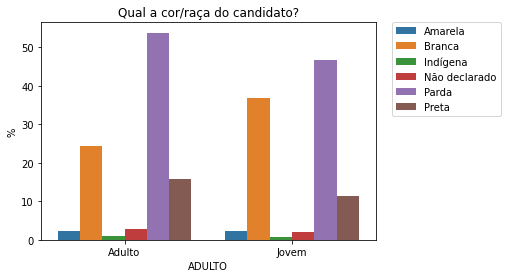

In [ ]:
df_graph = df.groupby('ADULTO')['TP_COR_RACA_DESC'].value_counts(normalize=True).rename('%').mul(100).reset_index()
sns.barplot(x="ADULTO", y="%", hue='TP_COR_RACA_DESC', data=df_graph)
plt.title("Qual a cor/raça do candidato?")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df.groupby('ADULTO')['TP_COR_RACA_DESC'].value_counts(normalize=True)

ADULTO  TP_COR_RACA_DESC
Adulto  Parda               0.537762
        Branca              0.242612
        Preta               0.158574
        Não declarado       0.028362
        Amarela             0.022717
        Indígena            0.009973
Jovem   Parda               0.467756
        Branca              0.367740
        Preta               0.114349
        Amarela             0.022610
        Não declarado       0.020900
        Indígena            0.006646
Name: TP_COR_RACA_DESC, dtype: float64

> Observa-se uma diferença importante na cor/raça entre os dois grupos (candidatos adultos e candidatos jovens): 
> * Pretos e Pardos correspondem a quase 70% dos candidatos entre os adultos, contra 58% entre os jovens.


#### Qual a língua estrangeira de preferência do candidato?

In [ ]:
df['TP_LINGUA_DESC'] = df['TP_LINGUA'].map({0:'Inglês', 1:'Espanhol'})

# Converte a variável qualitativa em category para conveniencia e performance
df['TP_LINGUA_DESC'] = df['TP_LINGUA_DESC'].astype('category')

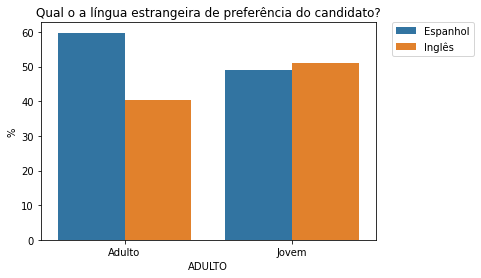

In [ ]:
df_graph = df.groupby('ADULTO')['TP_LINGUA_DESC'].value_counts(normalize=True).rename('%').mul(100).reset_index()
plt.title("Qual o a língua estrangeira de preferência do candidato?")
sns.barplot(x="ADULTO", y="%", hue='TP_LINGUA_DESC', data=df_graph)
plt.show()

In [ ]:
df.groupby('ADULTO')['TP_LINGUA_DESC'].value_counts(normalize=True)

ADULTO  TP_LINGUA_DESC
Adulto  Espanhol          0.597665
        Inglês            0.402335
Jovem   Inglês            0.509562
        Espanhol          0.490438
Name: TP_LINGUA_DESC, dtype: float64

> Há prevalência do espanhol (60%) como idioma para avaliação da lingua estrangeira entre os candidatos adultos.
> 
> No outro grupo, de candidatos com 19 anos ou menos, cerca de metade optaram pelo espanho, e a outra metade pelo inglês.

#### O candidato possui computador em casa?

In [ ]:
df['Q024_DESC'] = df['Q024'].map({'A':'Não',
                                  'B':'Sim, um',
                                  'C':'Sim, dois',
                                  'D':'Sim, três',
                                  'E':'Sim, quatro ou mais'})

# Converte a variável qualitativa em category para conveniencia e performance
df['Q024_DESC'] = df['Q024_DESC'].astype('category')

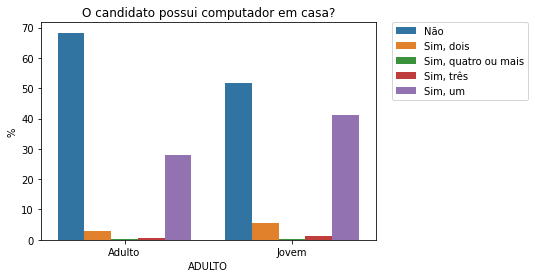

In [ ]:
df_graph = df.groupby('ADULTO')['Q024_DESC'].value_counts(normalize=True).rename('%').mul(100).reset_index()
plt.title("O candidato possui computador em casa?")
sns.barplot(x="ADULTO", y="%", hue='Q024_DESC', data=df_graph)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df.groupby('ADULTO')['Q024_DESC'].value_counts(normalize=True)

ADULTO  Q024_DESC          
Adulto  Não                    0.683211
        Sim, um                0.278581
        Sim, dois              0.029564
        Sim, três              0.006428
        Sim, quatro ou mais    0.002216
Jovem   Não                    0.516634
        Sim, um                0.411963
        Sim, dois              0.055936
        Sim, três              0.011902
        Sim, quatro ou mais    0.003565
Name: Q024_DESC, dtype: float64

> Cerca de 68% dos candidatos adultos não possuem computador em casa, enquanto que este percentual é de 51% entre aqueles os jovens.

#### O candidato possui internet em casa?


In [ ]:
df['Q025_DESC'] = df['Q025'].map({'A':'Não',
                                  'B':'Sim'})

# Converte a variável qualitativa em category para conveniencia e performance
df['Q025_DESC'] = df['Q025_DESC'].astype('category')

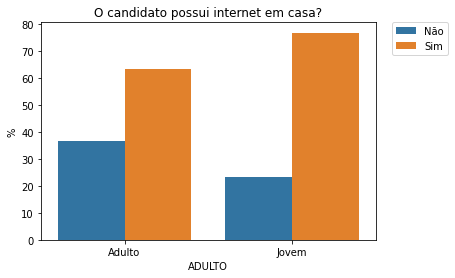

In [ ]:
df_graph = df.groupby('ADULTO')['Q025_DESC'].value_counts(normalize=True).rename('%').mul(100).reset_index()
plt.title("O candidato possui internet em casa?")
sns.barplot(x="ADULTO", y="%", hue='Q025_DESC', data=df_graph)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
df.groupby('ADULTO')['Q025_DESC'].value_counts(normalize=True)

ADULTO  Q025_DESC
Adulto  Sim          0.632215
        Não          0.367785
Jovem   Sim          0.768531
        Não          0.231469
Name: Q025_DESC, dtype: float64

> Cerca de 36% dos candidatos adultos não possuem acesso à internet em casa, enquanto que este percentual é de 24% entre os jovens.

## 4. Testes de Hipótese

In [ ]:
# cria função para realização dos testes de hipótese
def realiza_teste_quiquadrado(df, col1, col2, alpha=0.05):
  
  # obtem a tabela de contingência
  tabela_contingencia = pd.crosstab(df[col1], df[col2])
  
  # Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os col1 and col2
  chi, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

  # Verifica se o p_valor é menor que o nível de significância
  if p < alpha:
    print("As variáveis {} e {} são dependentes".format(col1, col2))
  else:
    print("As variáveis {} e {} não são dependentes".format(col1, col2))

  print()
  print("Tabela de Contingência:")
  print(tabela_contingencia)

#### Existe relação entre ser adulto e o idioma selecionado para realização da prova de lingua estrangeira?

In [ ]:
# Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os grupos
realiza_teste_quiquadrado(df, 'TP_LINGUA_DESC', 'ADULTO')

As variáveis TP_LINGUA_DESC e ADULTO são dependentes

Tabela de Contingência:
ADULTO          Adulto   Jovem
TP_LINGUA_DESC                
Espanhol        159647  480700
Inglês          107471  499444


#### Existe relação entre ser adulto e "não possuir computador em casa"?

In [ ]:
realiza_teste_quiquadrado(df, 'Q024_DESC', 'ADULTO')

As variáveis Q024_DESC e ADULTO são dependentes

Tabela de Contingência:
ADULTO               Adulto   Jovem
Q024_DESC                          
Não                  182498  506376
Sim, dois              7897   54825
Sim, quatro ou mais     592    3494
Sim, três              1717   11666
Sim, um               74414  403783


#### Existe relação entre ser adulto e "não possuir acesso a internet em casa"?

In [ ]:
realiza_teste_quiquadrado(df, 'Q025_DESC', 'ADULTO')

As variáveis Q025_DESC e ADULTO são dependentes

Tabela de Contingência:
ADULTO     Adulto   Jovem
Q025_DESC                
Não         98242  226873
Sim        168876  753271


#### Existe relação entre o idioma selecionado para realizar a prova de lingua estrangeira e a nota do candidato estar acima do 3 quartil?

In [ ]:
# Cria variável qualitativa indicativa de se a nota do candidato está acima do terceiro quantil
df['NOTA_ACIMA_3QUARTIL'] = df['NOTA_TOTAL']>df['NOTA_TOTAL'].quantile(.75)

In [ ]:
realiza_teste_quiquadrado(df, 'NOTA_ACIMA_3QUARTIL', 'TP_LINGUA_DESC')

As variáveis NOTA_ACIMA_3QUARTIL e TP_LINGUA_DESC são dependentes

Tabela de Contingência:
TP_LINGUA_DESC       Espanhol  Inglês
NOTA_ACIMA_3QUARTIL                  
False                  527429  408044
True                   112918  198871


#### Existe relação entre possuir computador em casa e a nota do candidato estar acima do 3 quartil?

In [ ]:
realiza_teste_quiquadrado(df, 'NOTA_ACIMA_3QUARTIL', 'Q024_DESC')

As variáveis NOTA_ACIMA_3QUARTIL e Q024_DESC são dependentes

Tabela de Contingência:
Q024_DESC               Não  Sim, dois  Sim, quatro ou mais  Sim, três  Sim, um
NOTA_ACIMA_3QUARTIL                                                            
False                583576      30592                 1547       5435   314323
True                 105298      32130                 2539       7948   163874


#### Existe relação entre "possuir internet em casa" e a nota do candidato estar acima do 3 quartil?

In [ ]:
realiza_teste_quiquadrado(df, 'NOTA_ACIMA_3QUARTIL', 'Q025_DESC')

As variáveis NOTA_ACIMA_3QUARTIL e Q025_DESC são dependentes

Tabela de Contingência:
Q025_DESC               Não     Sim
NOTA_ACIMA_3QUARTIL                
False                284194  651279
True                  40921  270868


## 5. Conclusões e Pontos de Melhoria

#### Conclusões
> * Maior índice de falta nas provas entre candidatos adultos (o dobro dos candidatos jovens), especialmente nas provas de Matemática e Ciências da Natureza.
* Nota média dos candidatos adultos (mu, 2367, sigma 396) é inferior aos candidatos jovens (mu 2579, sigma 378).
* Pretos e Pardos correspondem a quase 70% dos candidatos adultos, contra 58% dos jovens.
* Há prevalência do espanhol (60%) como idioma para avaliação da lingua estrangeira entre os candidatos adultos. Não existe preferência entre os jovens (50%).
* Cerca de 68% dos candidatos adultos não possuem computador em casa, enquanto que este percentual é de 51% entre aqueles os jovens.
* Cerca de 36% dos candidatos adultos não possuem acesso à internet em casa, enquanto que este percentual é de 24% entre os jovens.
* Há relação de dependência entre o idioma escolhido para prova de lingua estrangeira e a nota do candidato.
* Há relação de dependência entre "possuir computador em casa" e a nota do candidato.
* Há relação de dependência entre "possuir acesso à internet em casa" e a nota do candidato.

#### Pontos de Melhoria
> *   Base completa possui mais de 400 variáveis. Testar outras variáveis;
> *   Definir faixas de idade, ao invés de apenas jovem x adulto;
> *   Análise de regressão da idade;
> *   Buscar o CPF do candidato para tentar carcaterizar a realidade socio-econômica da família